# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ade Dicky Duta Rama
- **Email:** mc007d5y0813@student.devacademy.id
- **ID Dicoding:** MC007D5Y0813

## Menentukan Pertanyaan Bisnis

- Pada musim apa total penyewan casual maupun registerd sepeda meningkat dan menurun ?
- Apakah setiap musim penyewa casual berkurang lalu apakah penyewa registerd bertambah dan sebaliknya ?

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install streamlit
!pip install streamlit babel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- dari sini kita sudah dapat melihat kumpulan data penyewaan sepeda berdasarkan setiap harinya. Karena kita hanya membutuh kan data setiap musim saja

### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- dari dataset diatas menuntukkan tidak adanya missing value, yang artinya kita akan menguji dan menentukan apakah terdapat data yang duplicated

### Cleaning Data

In [6]:
# menguji apakah terdapat missing values dalam dataset day.csv

print("Missing values pada setiap colom dalam data day:")
print(df_day.isnull().sum())

# ceking apakah terdapat duplikasi di dataset day.csv
print("\nJumlah baris duplikat dalam data day:", df_day.duplicated().sum())

Missing values pada setiap colom dalam data day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah baris duplikat dalam data day: 0


In [7]:
#saya igin merubah label musim menjadi lebih jelas
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_mapping)

**Insight:**
- terbukti tidak ada missing values dan duplikasi data, dan saya merubah label musim menjadi lebih jelas

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
#jumlah total jumlah penyewa setiap musim nya
season_trend = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()
print(season_trend)

   season  casual  registered      cnt
0    Fall  226091      835038  1061129
1  Spring   60622      410726   471348
2  Summer  203522      715067   918589
3  Winter  129782      711831   841613


In [11]:
# ceking jumlah penyewa casual dan registered
season_trend['casual_diff'] = season_trend['casual_diff'].fillna(0)
season_trend['registered_diff'] = season_trend['registered_diff'].fillna(0)

print(season_trend)

   season  casual  registered      cnt  casual_diff  registered_diff
0    Fall  226091      835038  1061129          0.0              0.0
1  Spring   60622      410726   471348    -165469.0        -424312.0
2  Summer  203522      715067   918589     142900.0         304341.0
3  Winter  129782      711831   841613     -73740.0          -3236.0


**Insight:**
- jumlah penyewa tinggi pada musim Fall/Gugur lalu turun pada musim Spring/Semi
- jumlah penyewa casual dan registerd pada musim Spring/Semi turun jauh dan kembali meningkat pada Summer/Musim panas

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-12-a241381461b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_trend, x='season', y='cnt', palette='coolwarm')


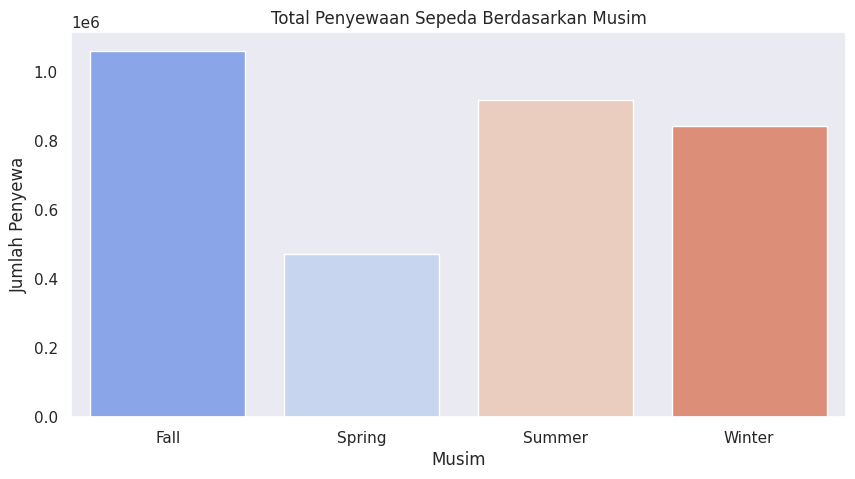

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=season_trend, x='season', y='cnt', palette='coolwarm')
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Musim")
plt.show()

**Insight:**
- pada musim gugur ke musim semi mengalami penurunan yang sangat signifikan, setelah itu pada musing panas penyewaan sepeda mengalami kenaikan akan tetapi pada musim dingin mengalami sedikit penurunan

### Pertanyaan 2:

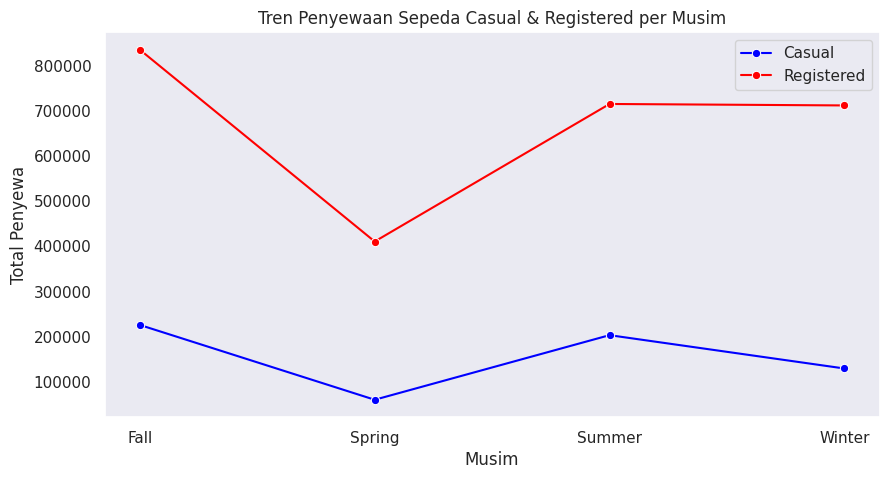

In [13]:
plt.figure(figsize=(10, 5))
# Plot garis untuk casual dan registered
sns.lineplot(data=season_trend, x='season', y='casual', marker='o', label='Casual', color='blue')
sns.lineplot(data=season_trend, x='season', y='registered', marker='o', label='Registered', color='red')

# Tambahkan label
plt.title("Tren Penyewaan Sepeda Casual & Registered per Musim")
plt.ylabel("Total Penyewa")
plt.xlabel("Musim")
plt.legend()
plt.show()

**Insight:**
- pada musim semi pengguna atau penyewa casual dan registerd mengalami penurunan drastis, tetapi pada musim panas ke musim dingin pengguna registerd menurun sedikit dan pengguna casual mengalami penurunan yang lebih banyak dari pengguna registerd, yang artinya pengguna registered memilih menjadi pengguna registerd untuk menuju pada musim gugur selanjutnay

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

## Dashboard

In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_day = pd.read_csv("day.csv")

# Mapping season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_mapping)

# Group by season
season_trend = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()

# Hitung perubahan dari musim ke musim
season_trend['casual_diff'] = season_trend['casual'].diff().fillna(0)
season_trend['registered_diff'] = season_trend['registered'].diff().fillna(0)

# Tambahkan kategori tren
season_trend['trend'] = season_trend.apply(
    lambda row: 'Casual ↓, Registered ↑' if row['casual_diff'] < 0 and row['registered_diff'] > 0 else
                'Casual ↑, Registered ↓' if row['casual_diff'] > 0 and row['registered_diff'] < 0 else
                'Sama-sama Naik' if row['casual_diff'] > 0 and row['registered_diff'] > 0 else
                'Sama-sama Turun', axis=1)

# Streamlit UI
st.title("Dashboard Analisis Penyewaan Sepeda 🚴")

# Tampilkan data
st.subheader("Data Penyewaan Sepeda per Musim")
st.dataframe(season_trend)

# Plot 1: Bar Chart Perubahan Casual & Registered
st.subheader("Perubahan Penyewaan Casual & Registered per Musim")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=season_trend, x='season', y='casual_diff', color='blue', label='Casual Diff', ax=ax)
sns.barplot(data=season_trend, x='season', y='registered_diff', color='red', label='Registered Diff', ax=ax)
ax.axhline(0, color='black', linestyle='--')
ax.set_ylabel("Perubahan Jumlah Penyewa")
ax.set_xlabel("Musim")
ax.legend()
st.pyplot(fig)

# Plot 2: Line Chart Tren Penyewaan Casual & Registered
st.subheader("Tren Penyewaan Sepeda Casual & Registered per Musim")
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=season_trend, x='season', y='casual', marker='o', label='Casual', color='blue', ax=ax)
sns.lineplot(data=season_trend, x='season', y='registered', marker='o', label='Registered', color='red', ax=ax)
ax.set_ylabel("Total Penyewa")
ax.set_xlabel("Musim")
ax.legend()
st.pyplot(fig)

st.subheader("Kesimpulan Tren Penyewaan")
st.write(season_trend[['season', 'trend']])


Overwriting app.py


In [16]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.201.219:8501

⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://wild-colts-fail.loca.lt
  Stopping...
^C
